In [84]:
%matplotlib inline

from naima import models
from astropy import units as u
from astropy import table

from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np
from ipywidgets.widgets.interaction import interact

def plotSED_data(SEDfile,label='data',color='blue'):
    print 'Reading file =', SEDfile
    SED = table.Table.read( SEDfile, hdu=1 )        
    plt.errorbar(E[index],E2flux[index],yerr=arrowfraction*E2flux[index],uplims=True,fmt="none",ecolor=color)

def plotSED_sync_ic( distance= 1 *u.kpc, We=1e49 *u.erg, e_cut = 1e3*u.GeV,B=10 *u.uG,
               field="CMB", index=2,N=200):
    """
    Distance needs to be in kpc
    """
    Eunits = u.eV
    E = np.logspace(-6,13, N) * Eunits # photon energies
    electrondist = models.ExponentialCutoffPowerLaw(
        amplitude=u.Quantity(1e36,"1/eV"), e_0= 1*Eunits, alpha=index, e_cutoff=e_cut)

    ic = models.InverseCompton( electrondist, seed_photon_fields=[field] )
    syn = models.Synchrotron(electrondist, B=B)
    ic.set_We(We, Eemin=1 * u.GeV, Eemax=100 *u.TeV)
    syn.set_We(We, Eemin=1 * u.GeV, Eemax=100 *u.TeV)
    plt.loglog(E, ic.sed(E,distance=dist ),'-', alpha=0.8,label='IC')
    plt.loglog(E, syn.sed(E,distance=dist ),'-', alpha=0.8,label='Synch')

def plotSED_pi0( distance = 1*u.kpc, rho=1* u.cm**-3,
                Wp=1e50 *u.erg, e_cut = 1e3*u.GeV,  index=2,N=200):
    """
    Distance needs to be in kpc and density in cm-3
    """
    
    Eunits = u.eV
    E = np.logspace(-6,13, N) * Eunits # photon energies
    partdist = models.ExponentialCutoffPowerLaw(
        amplitude=u.Quantity(1e36,"1/eV"), e_0= 1*Eunits, alpha=index, e_cutoff=e_cut)
    
    pi0 = models.PionDecay(partdist, nh = rho)
    pi0.set_Wp(Wp, Epmin=1 * u.GeV, Epmax=100 *u.TeV) 
    plt.loglog(E, pi0.sed(E,distance=distance ),'-', alpha=0.8,label='$\pi_{0}$ decay')
    


In [85]:

dist = 1 * u.kpc
rho = 1.0 * u.cm**-3
We = 1e48 *u.erg
Wp = 1e50 *u.erg
Ecut_p = 100 *u.GeV
Ecut_e = 1e3 *u.GeV


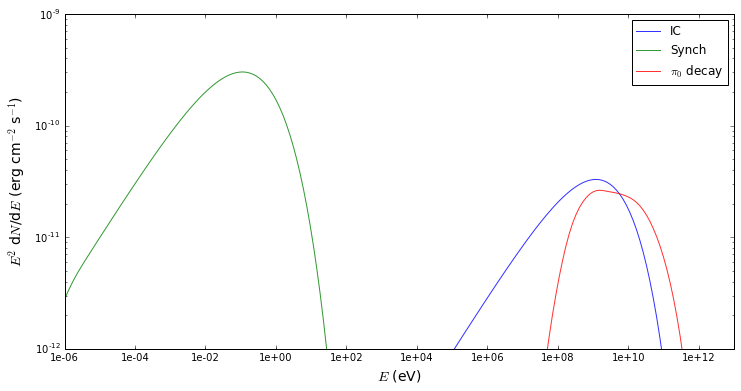

None

<function __main__.plotSED>

In [86]:


def plotSED(rho=rho,Ecut_p=Ecut_p,Ecut_e=Ecut_e,index=2,B=10):

    fig = plt.figure(figsize=(12,6))
    
    plotSED_sync_ic(distance = dist, index=index,e_cut = Ecut_e*u.GeV, B= B*u.uG)
    plotSED_pi0(distance=dist,rho=rho*u.cm**-3,Wp=1e50*u.erg, e_cut = Ecut_p*u.GeV,  index=index)
#    plotSED_data()

    plt.ylim(1e-12,1e-9)
    plt.xlim(1e-6,1e13)
    size=14
    plt.ylabel(r'$E^2$ d$N$/d$E$ (erg cm$^{-2}$ s$^{-1}$)',fontsize=size)
    plt.xlabel(r'$E$ (eV)',fontsize=size)
    ax = plt.gca()
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.e') )
    plt.legend(numpoints=1)
    plt.show()


interact(plotSED,Ecut_p=(1e2,1e3,1e2),Ecut_e=(1e2,1e3,1e2),index=(1.5,2.5,0.25),
         rho=(0.5,2,0.5), B=(10,40,5) )